In [1]:
import torch

from bindsnet.encoding.preprocessing import GaussianReceptiveFields

In [2]:
g = GaussianReceptiveFields(
    low=-1, high=1, n=5, scale=0.5
)

In [3]:
g(torch.zeros(1))

tensor([[0.1080],
        [0.4839],
        [0.7979],
        [0.4839],
        [0.1080]])

In [4]:
g(torch.rand(3, 2, 1)).shape

torch.Size([5, 3, 2, 1])

In [5]:
# this one includes poisson encoder. I'll change that later to leave the final encoder choice to the user
from bindsnet.encoding.encoders import GaussianReceptiveFieldsEncoder
from matplotlib import pyplot as plt

In [6]:
encoder = GaussianReceptiveFieldsEncoder(
    encoding_info={0: dict(start=-10, end=10, n=20, scale=0.5)},  # encodes feature 0
    time=100
)

In [7]:
# adds time spikes dimension and number of receptive fields dimension
encoder(torch.rand(1, 3, 2)).shape

torch.Size([100, 20, 3, 2])

In [8]:
# encode values -7, 0 and 4
encoded = encoder(torch.tensor([[-7, 0, 4]]))

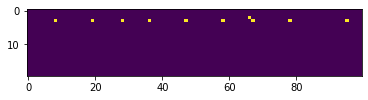

In [9]:
# -7
plt.imshow(encoded[..., 0].t())

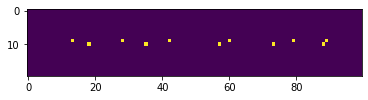

In [10]:
# 0
plt.imshow(encoded[..., 1].t())

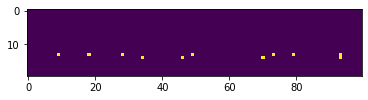

In [11]:
# 4
plt.imshow(encoded[..., 2].t())